Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6431 - accuracy: 0.8362 - val_loss: 0.3577 - val_accuracy: 0.9047
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3387 - accuracy: 0.9050 - val_loss: 0.2958 - val_accuracy: 0.9182
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2918 - accuracy: 0.9177 - val_loss: 0.2660 - val_accuracy: 0.9264
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2621 - accuracy: 0.9261 - val_loss: 0.2447 - val_accuracy: 0.9327
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2393 - accuracy: 0.9325 - val_loss: 0.2256 - val_accuracy: 0.9365
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2205 - accuracy: 0.9383 - val_loss: 0.2112 - val_accuracy: 0.9400
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2045 - accuracy: 0.9422 - val_loss: 0.1974 - val_accuracy:

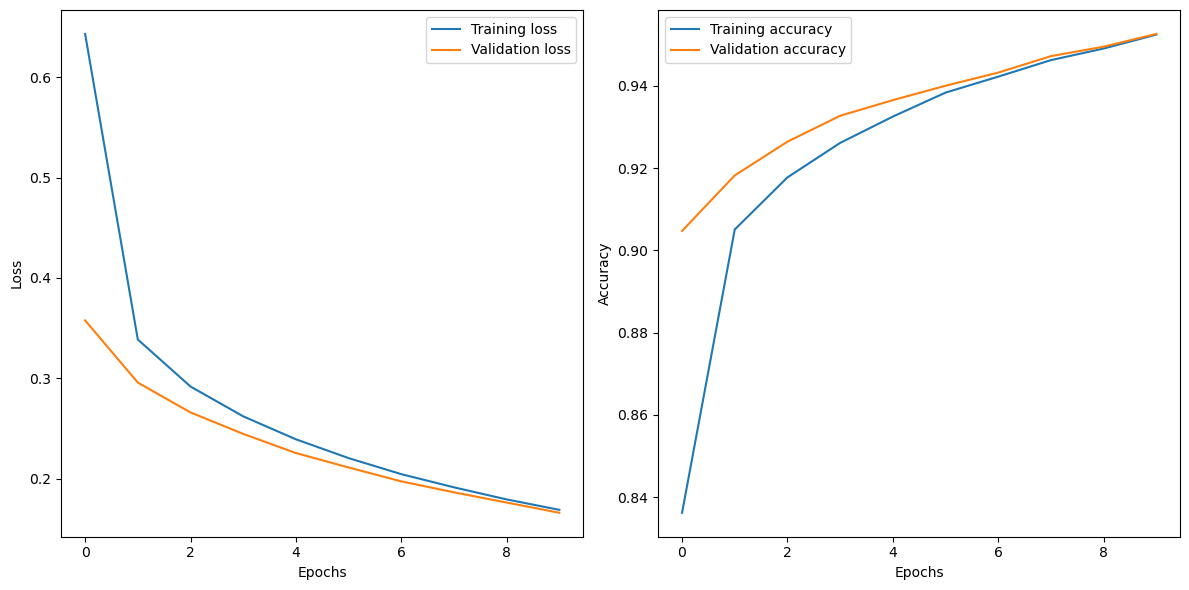

313/313 [==============================] - 0s 909us/step


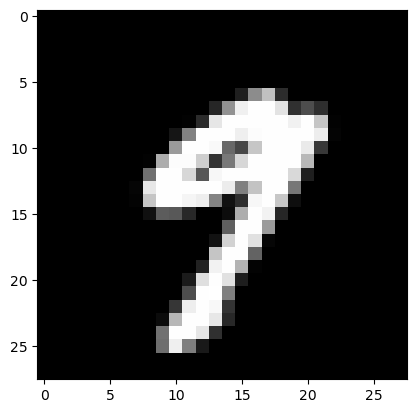

Predicted label: 9


In [2]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load training and test data from CSV
train_df = pd.read_csv('mnist_train.csv')  # Replace with actual path
test_df = pd.read_csv('mnist_test.csv')    # Replace with actual path

# Separate features and labels
x_train = train_df.iloc[:, 1:].values  # Assuming the first column is the label
y_train = train_df.iloc[:, 0].values   # Labels are in the first column

x_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape images to 28x28 for model compatibility
x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"This is Test_loss: {test_loss}, This is Test_acc: {test_acc}")

# Plot the training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Make a prediction and visualize it
pre_val = model.predict(x_test)
plt.imshow(x_test[20], cmap='gray')
plt.show()

print("Predicted label:", np.argmax(pre_val[20], axis=0))
